In [1]:
import numpy as np
%pylab inline
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import utils
from PIL import Image
from keras.models import Model
from keras.applications import VGG19
from keras.layers import Dense, GlobalAveragePooling2D, Activation
from keras import optimizers
from keras.utils import to_categorical
from scipy.ndimage import zoom

Populating the interactive namespace from numpy and matplotlib


Using TensorFlow backend.


In [2]:
def get_targets():
    filename = "train_ship_segmentation/train_ship_segmentations.csv"
    train_files, train_targets = utils.get_targets(filename)
    return train_files, train_targets
train_files, train_targets = get_targets()

In [3]:
def get_tensors():
    eval_tensors = utils.paths_to_tensor(train_files[:100]).astype('float32')/255
    return eval_tensors
eval_tensors = get_tensors()

100%|██████████| 100/100 [00:01<00:00, 89.52it/s]


In [4]:
def get_tensor(num):
    tensor_to_view = eval_tensors[num].reshape(1, 224, 224, 3)
    return tensor_to_view


In [5]:
def get_predictions(tensor):
    predition, activation_map = act_model.predict(tensor_to_view)
    return predition, activation_map


In [6]:
def get_mask(act_map, act=None):
    
    
    mat_for_mult = zoom(act_map, (1,32, 32, 1), order=2, mode='reflect', prefilter =False)
    weights_for_mult = np.array(act_model.layers[-1].get_weights()[0])
    
    final_output = np.dot(mat_for_mult, weights_for_mult)
    final_output2 = final_output[0, :, :, 1]
    
    
    return final_output2

In [7]:
def get_tensor_to_view(tensor_to_view):
    tensor_img = np.array(tensor_to_view)
    tensor_img = tensor_img[0, : , : , 0]
    
    return tensor_img

In [8]:
def compare_images(tens):
    failed_tensor = eval_tensors[tens]
    data = np.reshape(failed_tensor, (224,224,3))
    
    ###Seperate display image and heatmap
    #f, (ax1, ax2) = plt.subplots(1,2, figsize = (10,10))
    #ax1.imshow(final_output, cmap='jet', alpha=.5)
    #ax2.imshow(data, interpolation='nearest')
    
    plt.imshow(data, interpolation='nearest', aspect = 'auto')  
    plt.imshow(final_output, cmap='jet', alpha=.5, aspect = 'auto')
    plt.show()

In [9]:
act_model = utils.get_activation_model()

utils.py:78: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=[<tf.Tenso..., inputs=Tensor("in...)`


In [10]:
act_model.compile(loss='categorical_crossentropy', optimizer = optimizers.SGD(lr=0.0005, momentum=0.9), metrics = ['accuracy'])

In [11]:
act_model.load_weights('gap_AM_weights_improvement.hdf5')

('Prediction:', 1.0)


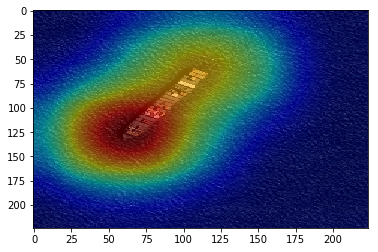

In [16]:

#Precision = .85

tensor_to_get = 10

tensor_to_view = get_tensor(tensor_to_get)

predition, activation_map = get_predictions(tensor_to_view)

print("Prediction:", predition[0][1])

final_output = get_mask(activation_map)

tensor_img = get_tensor_to_view(tensor_to_view)

compare_images(tensor_to_get)

In [4]:
####WHERE TO GO
##New Model ResNet??
##Different upsampling
#if __name__ == '__main__':

tensor_to_get = 1


def main():    
    ###Setup
    train_files, train_targets = get_targets()
    eval_tensors = get_tensors()
    act_model = utils.get_activation_model()
    act_model.compile(loss='categorical_crossentropy', optimizer = optimizers.SGD(lr=0.0005, momentum=0.9), metrics = ['accuracy'])
    act_model.load_weights('gap_AM_weights_improvement.hdf5')
    
    tensor_to_view = get_tensor(tensor_to_get)
    predition, activation_map = get_predictions(tensor_to_view)
    print("Prediction:", predition[0][1])
    #final_output = get_mask(activation_map)
    #tensor_img = get_tensor_to_view(tensor_to_view)
    #compare_images(tensor_to_get)

In [5]:
main()

NameError: global name 'get_tensors' is not defined